In [43]:
# Simulate data

M=30
NN = np.ones((3,M))
for i in range(M):
    n_obs = 5000
    n_vars = 100
    theta = 3
    X = np.random.normal(size=(n_obs, n_vars))
    d = np.dot(X[:, :3], np.array([5, 5, 5])) + np.random.standard_normal(size=(n_obs,))
    y = theta * d + np.dot(X[:, :3], np.array([5, 5, 5])) + np.random.standard_normal(size=(n_obs,))

    # array interface to DoubleMLData
    dml_data_sim = DoubleMLData.from_arrays(X[:int(n_obs*0.8)], y[:int(n_obs*0.8)], d[:int(n_obs*0.8)])

    learner = LassoCV()
    ml_l_sim = clone(learner)
    ml_m_sim = clone(learner)
    ml_g_sim = clone(learner)

    def non_orth_score(y, d, l_hat, m_hat, g_hat, smpls):
        u_hat = y - g_hat
        psi_a = -np.multiply(d, d)
        psi_b = np.multiply(d, u_hat)
        return psi_a, psi_b

    model = DoubleMLPLR(dml_data_sim, ml_l_sim, ml_m_sim, ml_g_sim, n_folds=1, apply_cross_fitting=False, score = non_orth_score)
    model.fit();
    NN[0,i] = model.coef[0]

    model = DoubleMLPLR(dml_data_sim, ml_l_sim, ml_m_sim, ml_g_sim, n_folds=1, apply_cross_fitting=False, score = 'IV-type')
    model.fit();
    NN[1,i] = model.coef[0]

    dml_data_sim = DoubleMLData.from_arrays(X, y, d)

    model = DoubleMLPLR(dml_data_sim, ml_l_sim, ml_m_sim, ml_g_sim, n_folds=5, apply_cross_fitting=True, score = 'IV-type')
    model.fit();
    NN[2,i] = model.coef[0]

In [44]:
MC_θ = NN.T
print(np.mean(MC_θ,axis=0))
print(np.std(MC_θ,axis=0))

[3.01284666 3.00822866 3.00713485]
[0.01513586 0.01470427 0.01558304]


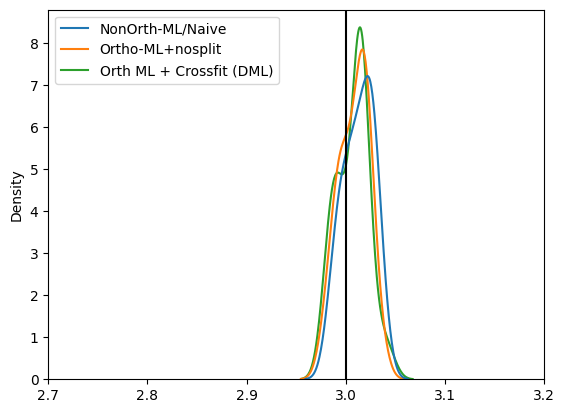

In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.DataFrame(MC_θ,columns=['NonOrth-ML/Naive','Ortho-ML+nosplit','Orth ML + Crossfit (DML)'])
sns.kdeplot(df)
plt.xlim([2.7, 3.2])
plt.axvline(3, color='black')
plt.savefig('ex1-5.png')

In [49]:
# Simulate data

M=30
NN = np.ones((3,M))
for i in range(M):
    n_obs = 5000
    n_vars = 100
    theta = 3
    X = np.random.normal(size=(n_obs, n_vars))
    d = np.sin(np.dot(X[:, :3], np.array([5, 5, 5]))) + np.random.standard_normal(size=(n_obs,))
    y = theta * d + np.exp(np.dot(X[:, :3], np.array([5, 5, 5]))) + np.random.standard_normal(size=(n_obs,))

    # array interface to DoubleMLData
    dml_data_sim = DoubleMLData.from_arrays(X[:int(n_obs*0.8)], y[:int(n_obs*0.8)], d[:int(n_obs*0.8)])

    learner = RandomForestRegressor(n_estimators = 500, max_features = 'sqrt', max_depth= 5)
    ml_l_bonus = clone(learner)
    ml_m_bonus = clone(learner)

    def non_orth_score(y, d, l_hat, m_hat, g_hat, smpls):
        u_hat = y - g_hat
        psi_a = -np.multiply(d, d)
        psi_b = np.multiply(d, u_hat)
        return psi_a, psi_b

    model = DoubleMLPLR(dml_data_sim, ml_l_sim, ml_m_sim, ml_g_sim, n_folds=1, apply_cross_fitting=False, score = non_orth_score)
    model.fit();
    NN[0,i] = model.coef[0]

    model = DoubleMLPLR(dml_data_sim, ml_l_sim, ml_m_sim, ml_g_sim, n_folds=1, apply_cross_fitting=False, score = 'IV-type')
    model.fit();
    NN[1,i] = model.coef[0]

    dml_data_sim = DoubleMLData.from_arrays(X, y, d)

    model = DoubleMLPLR(dml_data_sim, ml_l_sim, ml_m_sim, ml_g_sim, n_folds=5, apply_cross_fitting=True, score = 'IV-type')
    model.fit();
    NN[2,i] = model.coef[0]

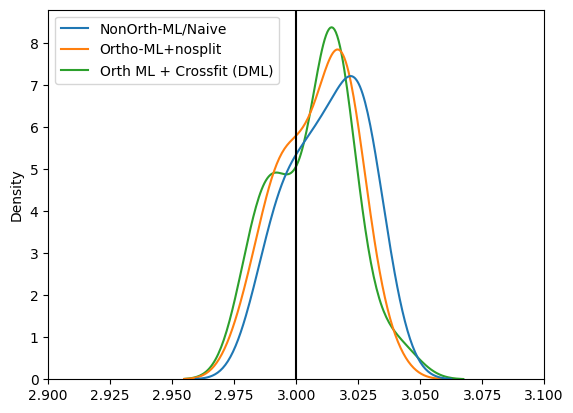

In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.DataFrame(MC_θ,columns=['NonOrth-ML/Naive','Ortho-ML+nosplit','Orth ML + Crossfit (DML)'])
sns.kdeplot(df)
plt.xlim([2.9, 3.1])
plt.axvline(3, color='black')
plt.savefig('ex1-5.png')